In [ ]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (10, 10)

In [ ]:
url = 'https://raw.githubusercontent.com/hiteshtripathi/Project-Linear-Regression-with-Numpy/665150e2896447a9a72cb10a5b7c577c97f9da0a/food_truck_dataset.txt'
df1 = pd.read_csv(url)

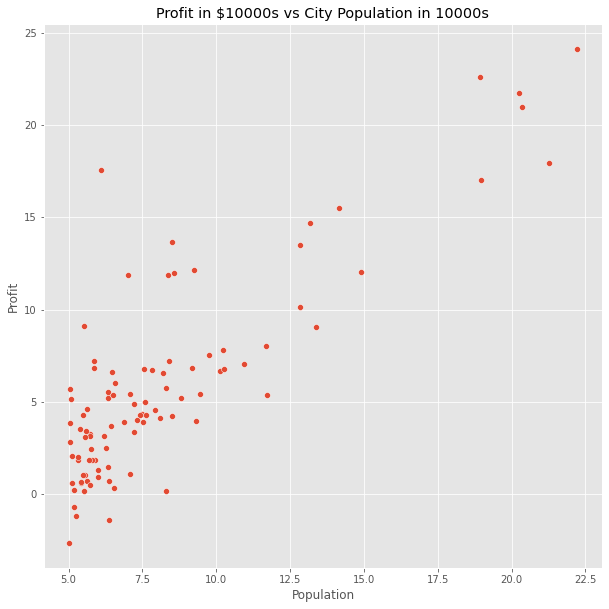

In [ ]:
ax = sns.scatterplot(x='Population', y='Profit', data=df1)
ax.set_title("Profit in $10000s vs City Population in 10000s");

In [ ]:
def cost_function(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    error = (y_pred - y) ** 2
    
    return 1 / (2 * m) * np.sum(error)

In [ ]:
m = df1.Population.values.size
# add another dimension to accomodate the intercept term and set it to all ones
X = np.append(np.ones((m, 1)), df1.Population.values.reshape(m, 1), axis=1)
y = df1.Profit.values.reshape(m, 1)
theta = np.zeros((2,1))

cost_function(X, y, theta)

32.072733877455676

In [ ]:
def gradient_descent(X, y, theta, alpha, iterations): 
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(), (y_pred - y))
        theta -= alpha * 1/m * error
        costs.append(cost_function(X, y, theta))
        
    return theta, costs

In [ ]:
theta, costs = gradient_descent(X, y, theta, alpha=0.01, iterations=1000)

print("h(x) = {} + {}x1".format(str(round(theta[0, 0], 2)),
                                str(round(theta[1, 0], 2))))

h(x) = -3.24 + 1.13x1


In [ ]:
costs[999]

4.515955503078912

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


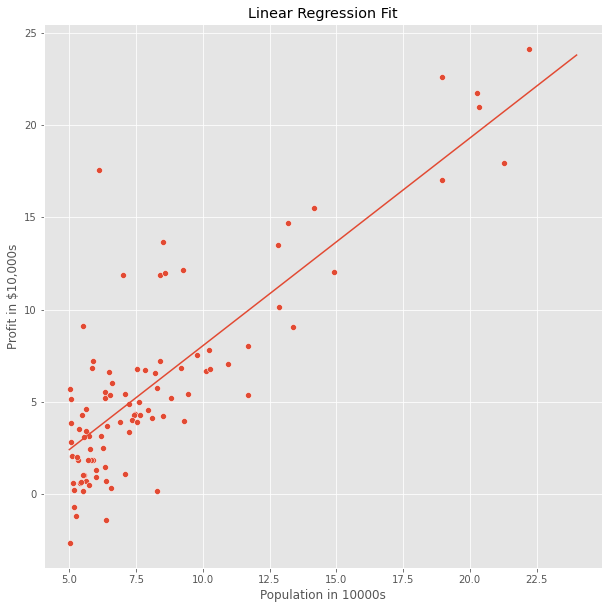

In [ ]:
theta = np.squeeze(theta)
sns.scatterplot(x = "Population", y= "Profit", data = df1)

x_value=[x for x in range(5, 25)]
y_value=[(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value,y_value)

plt.xlabel("Population in 10000s")
plt.ylabel("Profit in $10,000s")
plt.title("Linear Regression Fit");

In [ ]:
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(x_value, y_value)))
print('MSE: {}'.format(metrics.mean_squared_error(x_value, y_value)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(x_value, y_value))))

MAE: 1.3956362090657508
MSE: 2.4865772426186856
RMSE: 1.5768884686681826


In [ ]:
_def predict(x, theta):
    y_pred = np.dot(theta.transpose(), x)
    return y_pred

In [ ]:
y_pred_1 = predict(np.array([1, 4]),theta) * 10000
print("For a population of 40,000, the model predicts a profit of $" + str(round(y_pred_1, 0)))

For a population of 40,000, the model predicts a profit of $12678.0
